In [47]:
import numpy as np
import matplotlib.pyplot as plt

def conditioning_simulation(init_cs_w, cs_times):

    # parameters 
    # Membrane and channel properties
    cm = 10.0         # (nF/mm^2)
    gL = 1.0          # (uS/mm^2)
    EL = -70.0        # (mV)
    Eex = 0.0         # (mV)
    Vth = -54.0       # (mV)
    Vreset = -80.0    # (mV)

    # Synaptic 
    tau_ex = 5.0       # (mS)
    delta_g_US = 1.2   # (uS/mm^2)

    # STDP
    A_LTP = 0.35       # (uS/mm^2)
    A_LTD = 0.4        # (uS/mm^2)
    tau_LTP = 25.0     # (ms)
    tau_LTD = 35.0     # (ms)
    gcs_max = 1.2      # (uS/mm^2)

    dt = 0.1         
    t_max = 1000   
    us_times = [100, 200, 300, 400, 500, 600]

    V = EL          
    g_ex = 0.0        
    delta_g_CS = init_cs_w
    last_cs_time = -np.inf     
    last_spike_time = -np.inf
    
    V_trace = []
    g_ex_trace = []
    delta_g_CS_trace = []
    spike_times = []
    
    time_steps = np.arange(0, t_max, dt)
    
    for t in time_steps:
        if t in us_times:
            g_ex += delta_g_US

        if t in cs_times:
            g_ex += delta_g_CS
            delta_t_LTD = t - last_spike_time      
            depression = A_LTD * np.exp(-delta_t_LTD / tau_LTD)
            delta_g_CS = max(0, delta_g_CS - depression)
            last_cs_time = t

        dg_ex_dt = -g_ex / tau_ex          # conductance decay
        g_ex += dg_ex_dt * dt

        dV_dt = (-gL * (V - EL) - g_ex * (V - Eex)) / cm      # Integrate-and-Fire model
        V += dV_dt * dt


        if V >= Vth:
            spike_times.append(t)
            last_spike_time = t
            V = Vreset

            delta_t_LTP = t - last_cs_time                # LTP rule for CS 
            potentiation = A_LTP * np.exp(-delta_t_LTP / tau_LTP)
            delta_g_CS = min(gcs_max, delta_g_CS + potentiation)


        V_trace.append(V)
        g_ex_trace.append(g_ex)
        delta_g_CS_trace.append(delta_g_CS)
    
    return V_trace, delta_g_CS_trace,  spike_times

/var/folders/yj/kt1bsrsn4yl7tghpbyl_gxrc0000gn/T/ipykernel_24817/3402347790.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


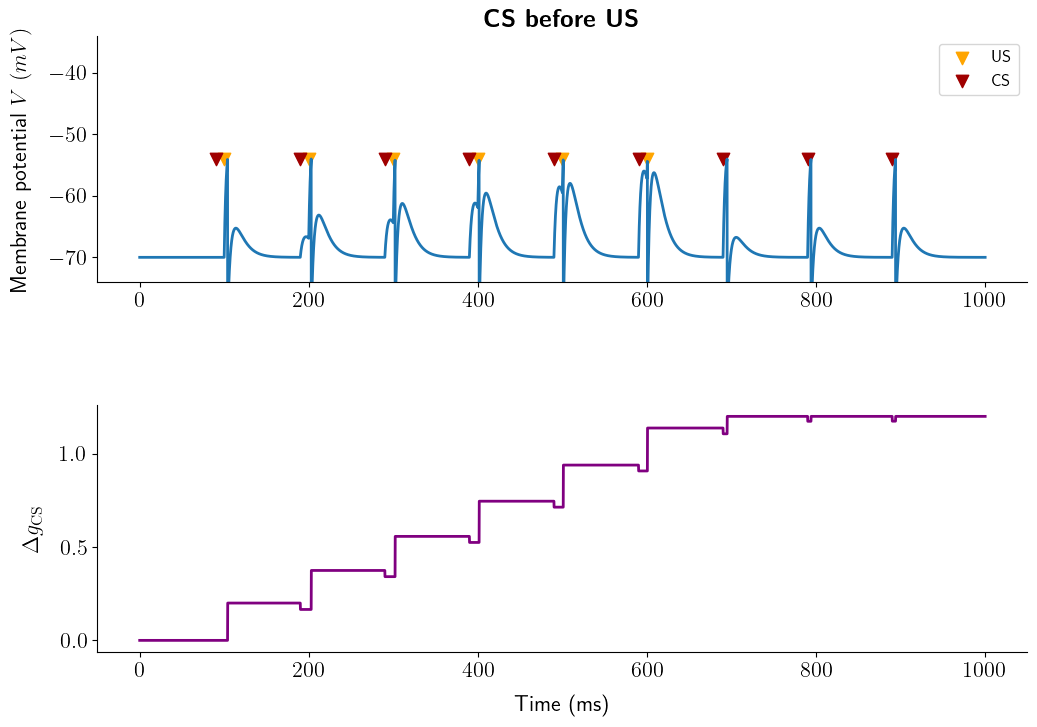

/var/folders/yj/kt1bsrsn4yl7tghpbyl_gxrc0000gn/T/ipykernel_24817/3402347790.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


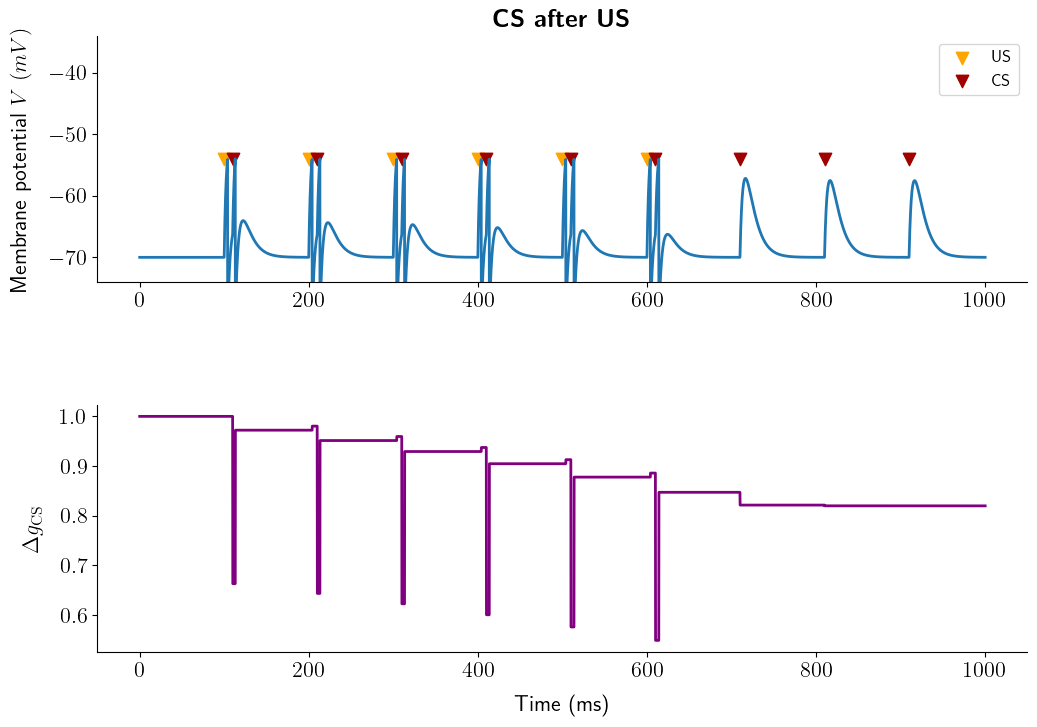

In [48]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import numpy as np

    # --- Global plot style ---
    plt.rcParams.update({
        "font.size": 16,
        "text.usetex": True,
        "figure.figsize": (12, 8)
    })

    def remove_spines(ax):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    dt = 0.1
    Vth = -54.0
    us_times = [100, 200, 300, 400, 500, 600]
    
    #'#1f6f6f', '#a00000', '#ea801c'
    # Conditioning (CS before US)
    cs1 = [90, 190, 290, 390, 490, 590, 690, 790, 890]
    voltage1, w_cs_1, spikes1 = conditioning_simulation(0.0, cs1)
    times1 = np.arange(len(voltage1)) * dt

    fig1, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'hspace': 0.5})
    ax1.plot(times1, voltage1, color='C0', linewidth=2)
    ax1.scatter(us_times, [Vth]*len(us_times), color='orange', marker='v', s=80, label='US')
    ax1.scatter(cs1, [Vth]*len(cs1), color='#a00000', marker='v', s=80, label='CS')
    ax1.set_title(r'\textbf{ CS before US}', fontsize=18)
    ax1.set_ylabel(r'Membrane potential $V$ $(mV)$', labelpad=12)
    ax1.set_ylim(Vth - 20, Vth + 20)
    ax1.legend(loc='upper right', fontsize=12)
    remove_spines(ax1)

    ax2.plot(times1, w_cs_1, color='purple', linewidth=2)
    ax2.set_xlabel(r'Time (ms)', labelpad=10)
    ax2.set_ylabel(r'$\Delta g_{\mathrm{CS}}$', labelpad=12)
    remove_spines(ax2)

    plt.tight_layout()
    plt.savefig('conditioning_plot.png', dpi=300)
    plt.show()

    # Extinction (CS after US)
    cs2 = [110, 210, 310, 410, 510, 610, 710, 810, 910]
    voltage2, w_cs_2, spikes2 = conditioning_simulation(1.0, cs2)
    times2 = np.arange(len(voltage2)) * dt

    fig2, (ax3, ax4) = plt.subplots(2, 1, gridspec_kw={'hspace': 0.5})
    ax3.plot(times2, voltage2, color='C0', linewidth=2)
    ax3.scatter(us_times, [Vth]*len(us_times), color='orange', marker='v', s=80, label='US')
    ax3.scatter(cs2, [Vth]*len(cs2), color='#a00000', marker='v', s=80, label='CS')
    ax3.set_title(r'\textbf{CS after US}', fontsize=18)
    ax3.set_ylabel(r'Membrane potential $V$ $(mV)$', labelpad=12)
    ax3.set_ylim(Vth - 20, Vth + 20)
    ax3.legend(loc='upper right', fontsize=12)
    remove_spines(ax3)

    ax4.plot(times2, w_cs_2, color='purple', linewidth=2)
    ax4.set_xlabel(r'Time (ms)', labelpad=10)
    ax4.set_ylabel(r'$\Delta g_{\mathrm{CS}}$', labelpad=12)
    remove_spines(ax4)

    plt.tight_layout()
    plt.savefig('extinction_plot.png', dpi=300)
    plt.show()



